# Characteristics of a High Grossing Film
### _What effects film revenue_

Since the unveiling of the kinetoscope in 1891, cinema has evolved from short silent films to feature-length productions that combine sound, music, and dialogue. Over the decades, films have become a central part of global culture, influencing societal trends and reflecting shared values. Modern movies vary widely in genre, runtime, and creative vision, with directors playing a pivotal role in shaping the final product. However, the factors that drive a film's financial success remain a topic of interest, particularly when considering how directors, alongside genre and runtime, might impact revenue.

This project investigates the relationship between a movie’s revenue and three key variables: the director, genre, and runtime. Using a dataset of 1,000 films from IMDB, which includes information on directors, genres, runtimes, and box office earnings, I aim to uncover patterns in how these factors interact. Specifically, the analysis will explore whether certain directors are associated with higher revenues across genres and runtimes, and whether these variables interact to influence a film’s financial success. By identifying trends in the data, this study seeks to offer insights into the interplay of artistic and commercial decisions, providing value for filmmakers, producers, and audiences in understanding the drivers of box office performance.

![IMDB](https://www.panoramaaudiovisual.com/wp-content/uploads/2019/06/IMDB.jpg)
##### *Image source: https://www.panoramaaudiovisual.com/wp-content/uploads/2019/06/IMDB.jpg*

## Analysis
### Data Collection

A subset of data from IMDB was sourced from [Kaggle](https://www.kaggle.com/datasets), an online resource of datasets [1].

In [ ]:
# loading libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

In [ ]:
# Loading the data set
IMDB = pd.read_csv("imdb_movie_dataset.csv")

### Data Cleaning

The original IMDB dataset had a few columns that did not have much effect on data and results, so they were removed. The genre column had a few variables with multiple genres listed they were condensed to a single genre for better analyses.

In [3]:
# Dropped columns based on opinion and not fact as well as added information about the film that would not affect analyses
IMDB = IMDB.drop(["Rank","Description","Actors","Year","Rating","Votes","Metascore"], axis= 1)
# Rename columns
IMDB.columns = ['Title','Genre','Director','Runtime','Revenue']
# There are some titles without revenue, they are dropped
IMDB = IMDB.dropna()
nindx = np.arange(start=0, stop=len(IMDB))
IMDB.set_index(nindx,inplace=True)

Sort the runtimes into seven categoreies to show the effects of runtimes in 20 minute increments.

*(60-80, 81-100, 101-120, 121-140, 141-160, 161-180, 181-200)*

In [ ]:
# display(IMDB.head(10))
runtimes = pd.Series(str)
for i in IMDB.index:
    # print(i)
    if runtimes[0] == str:
        if IMDB.iloc[i].Runtime <= 80:
            runtimes[0] = "60-80"
        elif IMDB.iloc[i].Runtime <= 100:
            runtimes[0] = "81-100"
        elif IMDB.iloc[i].Runtime <= 120:
            runtimes[0] = "101-120"
        elif IMDB.iloc[i].Runtime <= 140:
            runtimes[0] = "121-140"
        elif IMDB.iloc[i].Runtime <= 160:
            runtimes[0] = "141-160"
        elif IMDB.iloc[i].Runtime <= 180:
            runtimes[0] = "161-180"
        elif IMDB.iloc[i].Runtime <= 200:
            runtimes[0] = "181-200"
    else:
        if IMDB.iloc[i].Runtime <= 80:
            runtimes[len(runtimes)] = "60-80"
        elif IMDB.iloc[i].Runtime <= 100:
            runtimes[len(runtimes)] = "81-100"
        elif IMDB.iloc[i].Runtime <= 120:
            runtimes[len(runtimes)] = "101-120"
        elif IMDB.iloc[i].Runtime <= 140:
            runtimes[len(runtimes)] = "121-140"
        elif IMDB.iloc[i].Runtime <= 160:
            runtimes[len(runtimes)] = "141-160"
        elif IMDB.iloc[i].Runtime <= 180:
            runtimes[len(runtimes)] = "161-180"
        elif IMDB.iloc[i].Runtime <= 200:
            runtimes[len(runtimes)] = "181-200"
IMDB.Runtime = runtimes

Now that the data has been collected and cleaned, I will explore the relationships between genre, director, and runtime on revenue of films with exploratory analysis, utilizing statistical summaries and visualisations.

### Distributions

First I will explore distributions of genre, directors, and runtime from the data set.

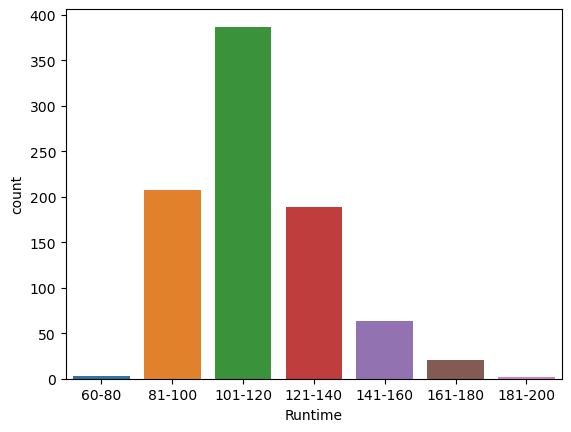

In [5]:
# Distrobution of runtime
c = sns.countplot(x = IMDB.Runtime, order = ["60-80","81-100","101-120","121-140","141-160","161-180","181-200"])

Descriptive analysis of runtime reveals wide ranges of movie runtimes

In [6]:
# Descriptive analysis of runtime
print(f"60-80: {IMDB.Title.groupby(IMDB.Runtime).count()['60-80']}")
print(f"81-100: {IMDB.Title.groupby(IMDB.Runtime).count()['81-100']}")
print(f"101-120: {IMDB.Title.groupby(IMDB.Runtime).count()['101-120']}")
print(f"121-140: {IMDB.Title.groupby(IMDB.Runtime).count()['121-140']}")
print(f"141-160: {IMDB.Title.groupby(IMDB.Runtime).count()['141-160']}")
print(f"161-180: {IMDB.Title.groupby(IMDB.Runtime).count()['161-180']}")
print(f"181-200: {IMDB.Title.groupby(IMDB.Runtime).count()['181-200']}")

60-80: 3
81-100: 207
101-120: 387
121-140: 189
141-160: 63
161-180: 21
181-200: 2


Distribution of films by genre

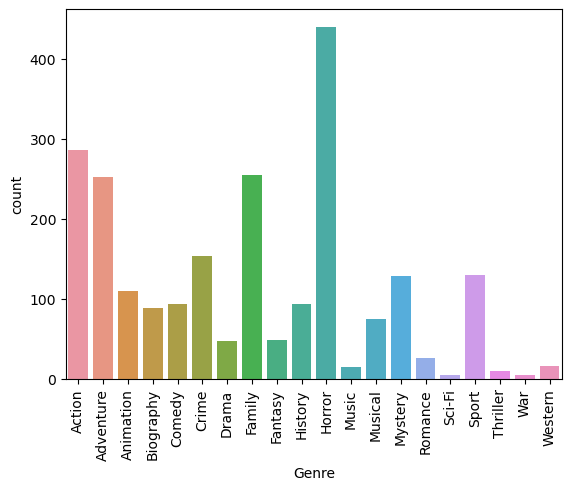

In [7]:
# Genre organizing due to multi-genre movies
IMDBg = IMDB
IMDBg.Genre = IMDBg.Genre.str.split(',')
IMDBg = IMDBg.explode('Genre')
# Distrobution of film genre
b = sns.countplot(x = IMDBg.Genre)
b = b.set_xticklabels(labels = IMDBg.groupby(IMDBg.Genre).count().index, rotation = 90)

### Genre, runtime and director effects on revnue

Focusing on Genre's effects on revenue

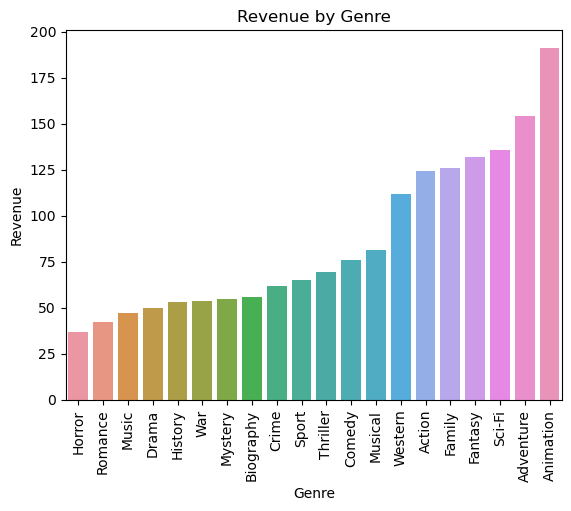

In [ ]:
# Visualisation of revenue by genre
g = IMDBg.groupby(IMDBg.Genre).mean(numeric_only=True)
g = g.sort_values('Revenue')
rev = sns.barplot(x= g.index, y= g.Revenue)
rev.set(title = "Revenue by Genre")
rev = rev.set_xticklabels(labels = g.index, rotation = 90)

Focusing on runtime's effects on revenue

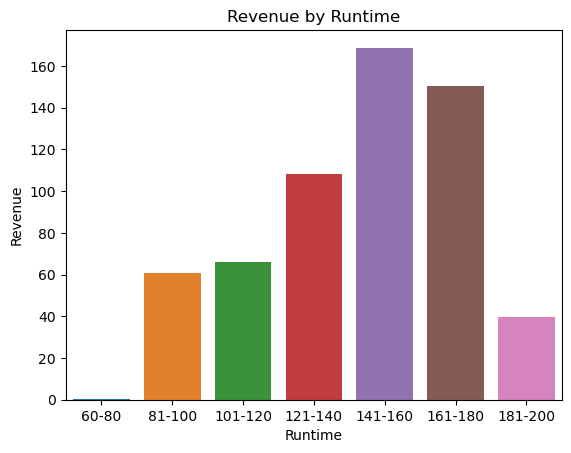

In [ ]:
# visualization of revenue by runtime
r = IMDB.groupby(IMDB.Runtime).mean(numeric_only=True)
r = r.reindex(["60-80","81-100","101-120","121-140","141-160","161-180","181-200"])
rev = sns.barplot(x= r.index, y= r.Revenue)
rev = rev.set(title = "Revenue by Runtime")

In [ ]:
# Analysis of runtime by revenue
print(f"Max revenue by Runtime: {IMDB.Revenue.groupby(IMDB.Runtime).mean().idxmax()} with ${round(IMDB.Revenue.groupby(IMDB.Runtime).mean().max(),2)} million")
print(f"Min revenue by Runtime: {IMDB.Revenue.groupby(IMDB.Runtime).mean().idxmin()} with ${round(IMDB.Revenue.groupby(IMDB.Runtime).mean().min(),2)} million")
print(f"An average movie ha a runtime between {IMDB.Revenue.groupby(IMDB.Runtime).count().idxmax()} minutes, and a revenue of about ${round(IMDB.Revenue.groupby(IMDB.Runtime).count().mean(),2)} million")

Max revenue by Runtime: 141-160 with $168.76 million
Min revenue by Runtime: 60-80 with $0.45 million
An average movie ha a runtime between 101-120 minutes, and a revenue of about $124.57 million


Focusing on the effects of directors on revenu

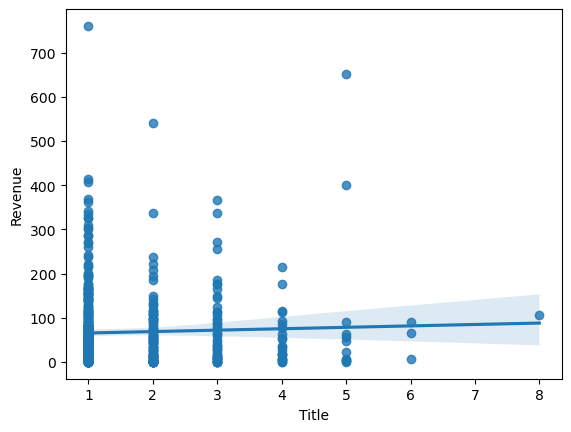

In [ ]:
# visualizing directors by revenue and number of movies listed
d = IMDB.groupby(IMDB.Director).mean(numeric_only=True)
d = d.sort_values('Revenue')
d = sns.regplot(x = IMDB.Title.groupby(IMDB.Director).count(), y = d.Revenue, data=IMDB)

Directors have zero to little effect on revenue represented in the dataset. A larger dataset may find different results with respect to directors.

### Runtime and Genre on Revenue

Analysis to see if a certain runtime and genre is likely to produce high revenue

In [12]:
# creating a grouped dataframe to represent Runtime, Genre, and Revenue
IMDBgrouped = IMDBg['Revenue'].groupby([IMDBg['Runtime'], IMDBg['Genre']]).mean().unstack()
IMDBgrouped = IMDBgrouped.reindex(["60-80","81-100","101-120","121-140","141-160","161-180","181-200"])
# Initialization of Dataframes to store max revenue values in Runtime by Genre and Genre by Runtime respectively
IMDBrmax = pd.DataFrame(index = ["60-80","81-100","101-120","121-140","141-160","161-180","181-200"], columns= ['Genre','Revenue'])
IMDBgmax = pd.DataFrame(index = ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western'], columns= ['Runtime','Revenue'])

The following graphs depict revenue of runtime by genre

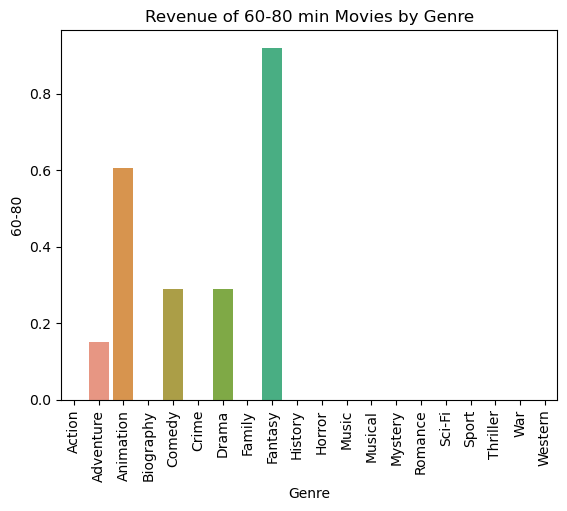

In [13]:
rev = sns.barplot(x= IMDBgrouped.loc['60-80'].index, y= IMDBgrouped.loc['60-80'])
rev.set(title = "Revenue of 60-80 min Movies by Genre")
rev = rev.set_xticklabels(labels = ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western'], rotation = 90)
IMDBrmax.loc['60-80'].Revenue = round(IMDBgrouped.loc['60-80'].max(),2)
IMDBrmax.loc['60-80'].Genre = IMDBgrouped.loc['60-80'].idxmax()

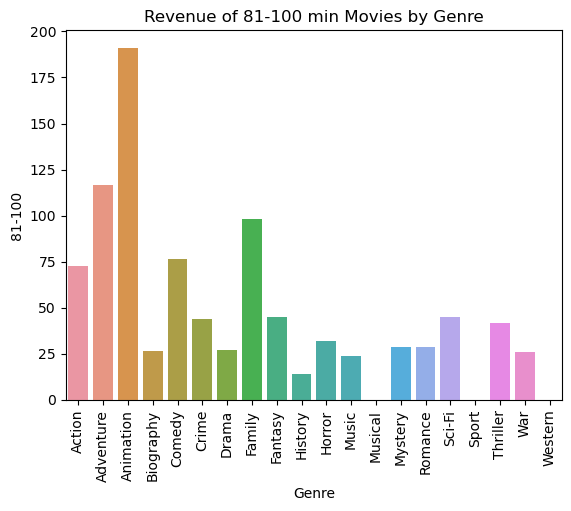

In [14]:
rev = sns.barplot(x= IMDBgrouped.loc['81-100'].index, y= IMDBgrouped.loc['81-100'])
rev.set(title = "Revenue of 81-100 min Movies by Genre")
rev = rev.set_xticklabels(labels = ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western'], rotation = 90)
IMDBrmax.loc['81-100'].Revenue = round(IMDBgrouped.loc['81-100'].max(),2)
IMDBrmax.loc['81-100'].Genre = IMDBgrouped.loc['81-100'].idxmax()

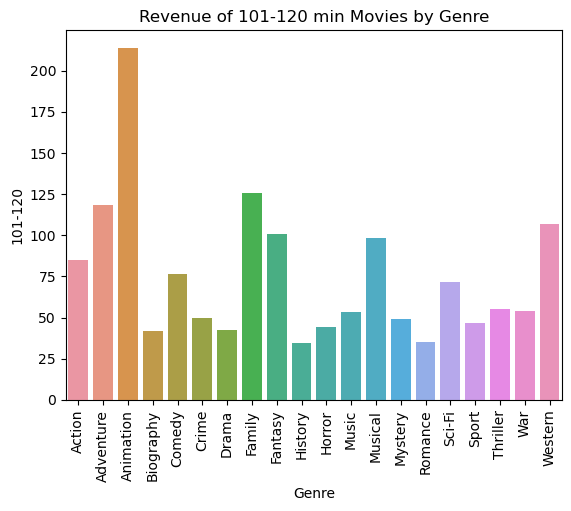

In [15]:
rev = sns.barplot(x= IMDBgrouped.loc['101-120'].index, y= IMDBgrouped.loc['101-120'])
rev.set(title = "Revenue of 101-120 min Movies by Genre")
rev = rev.set_xticklabels(labels = ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western'], rotation = 90)
IMDBrmax.loc['101-120'].Revenue = round(IMDBgrouped.loc['101-120'].max(),2)
IMDBrmax.loc['101-120'].Genre = IMDBgrouped.loc['101-120'].idxmax()

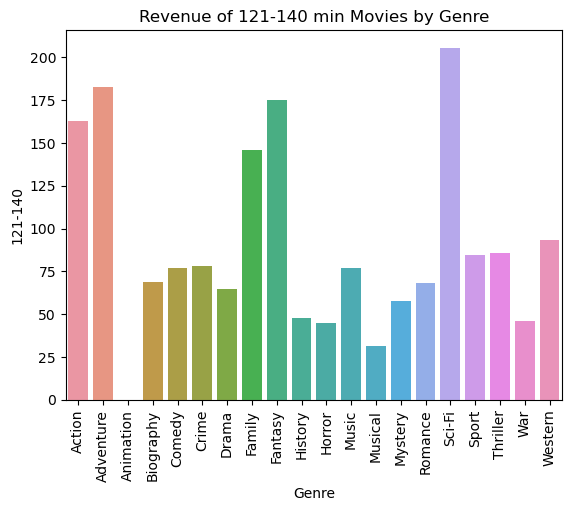

In [16]:
rev = sns.barplot(x= IMDBgrouped.loc['121-140'].index, y= IMDBgrouped.loc['121-140'])
rev.set(title = "Revenue of 121-140 min Movies by Genre")
rev = rev.set_xticklabels(labels = ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western'], rotation = 90)
IMDBrmax.loc['121-140'].Revenue = round(IMDBgrouped.loc['121-140'].max(),2)
IMDBrmax.loc['121-140'].Genre = IMDBgrouped.loc['121-140'].idxmax()

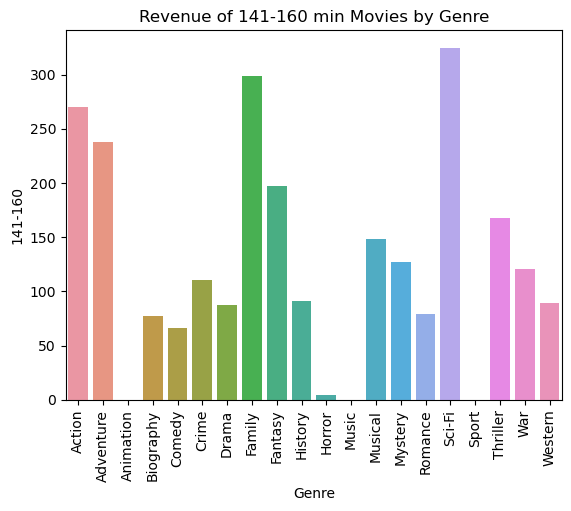

In [17]:
rev = sns.barplot(x= IMDBgrouped.loc['141-160'].index, y= IMDBgrouped.loc['141-160'])
rev.set(title = "Revenue of 141-160 min Movies by Genre")
rev = rev.set_xticklabels(labels = ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western'], rotation = 90)
IMDBrmax.loc['141-160'].Revenue = round(IMDBgrouped.loc['141-160'].max(),2)
IMDBrmax.loc['141-160'].Genre = IMDBgrouped.loc['141-160'].idxmax()

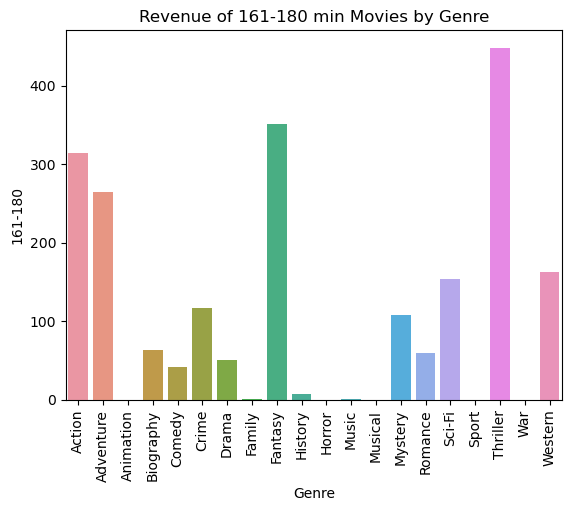

In [18]:
rev = sns.barplot(x= IMDBgrouped.loc['161-180'].index, y= IMDBgrouped.loc['161-180'])
rev.set(title = "Revenue of 161-180 min Movies by Genre")
rev = rev.set_xticklabels(labels = ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western'], rotation = 90)
IMDBrmax.loc['161-180'].Revenue = round(IMDBgrouped.loc['161-180'].max(),2)
IMDBrmax.loc['161-180'].Genre = IMDBgrouped.loc['161-180'].idxmax()

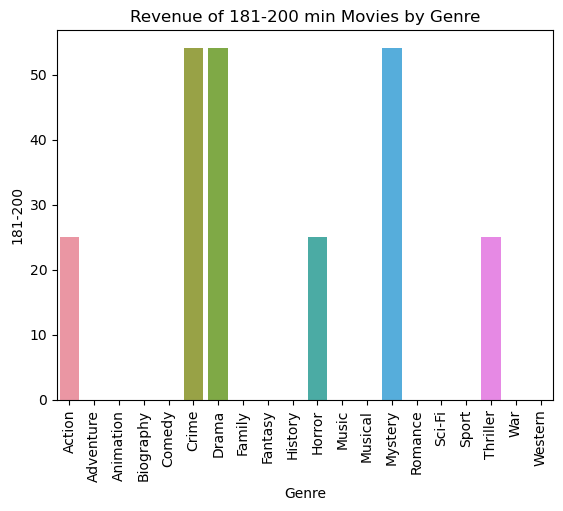

In [19]:
rev = sns.barplot(x= IMDBgrouped.loc['181-200'].index, y= IMDBgrouped.loc['181-200'])
rev.set(title = "Revenue of 181-200 min Movies by Genre")
rev = rev.set_xticklabels(labels = ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western'], rotation = 90)
IMDBrmax.loc['181-200'].Revenue = round(IMDBgrouped.loc['181-200'].max(),2)
IMDBrmax.loc['181-200'].Genre = IMDBgrouped.loc['181-200'].idxmax()

The following graphs depict revenue of Genre by runtime

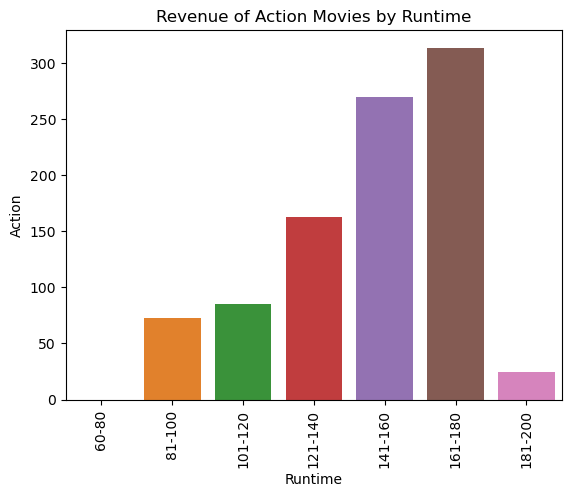

In [20]:
rev = sns.barplot(x= IMDBgrouped.T.loc['Action'].index, y= IMDBgrouped.T.loc['Action'])
rev.set(title = "Revenue of Action Movies by Runtime")
rev = rev.set_xticklabels(labels = IMDBgrouped.index, rotation = 90)
IMDBgmax.loc['Action'].Revenue = round(IMDBgrouped.T.loc['Action'].max(),2)
IMDBgmax.loc['Action'].Runtime = IMDBgrouped.T.loc['Action'].idxmax()

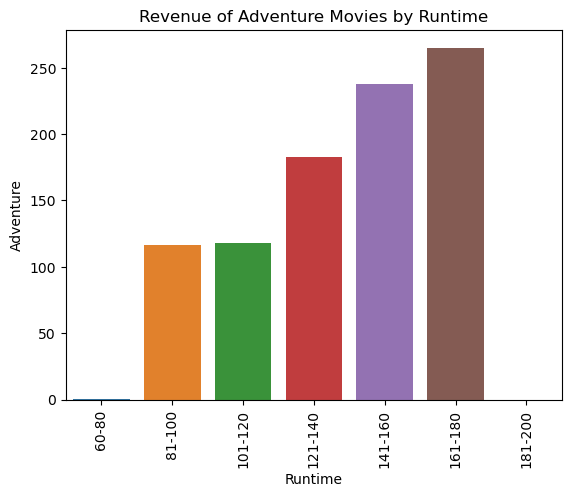

In [21]:
rev = sns.barplot(x= IMDBgrouped.T.loc['Adventure'].index, y= IMDBgrouped.T.loc['Adventure'])
rev.set(title = "Revenue of Adventure Movies by Runtime")
rev = rev.set_xticklabels(labels = IMDBgrouped.index, rotation = 90)
IMDBgmax.loc['Adventure'].Revenue = round(IMDBgrouped.T.loc['Adventure'].max(),2)
IMDBgmax.loc['Adventure'].Runtime = IMDBgrouped.T.loc['Adventure'].idxmax()

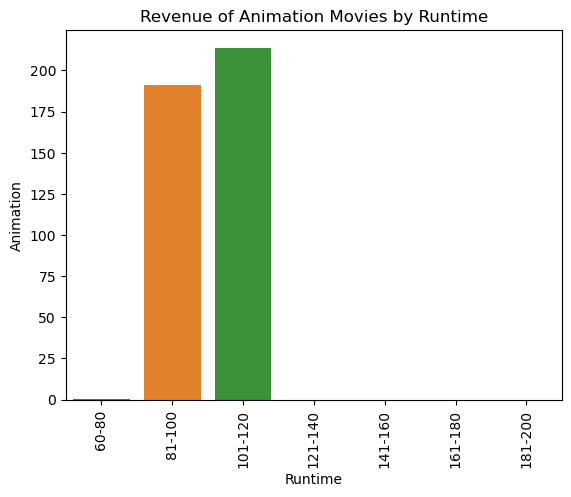

In [22]:
rev = sns.barplot(x= IMDBgrouped.T.loc['Animation'].index, y= IMDBgrouped.T.loc['Animation'])
rev.set(title = "Revenue of Animation Movies by Runtime")
rev = rev.set_xticklabels(labels = IMDBgrouped.index, rotation = 90)
IMDBgmax.loc['Animation'].Revenue = round(IMDBgrouped.T.loc['Animation'].max(),2)
IMDBgmax.loc['Animation'].Runtime = IMDBgrouped.T.loc['Animation'].idxmax()

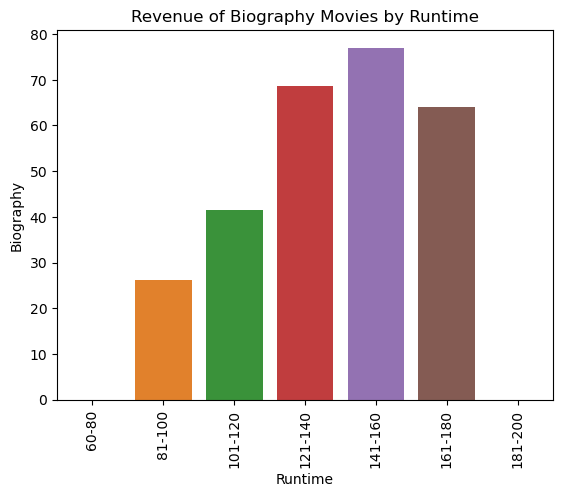

In [23]:
rev = sns.barplot(x= IMDBgrouped.T.loc['Biography'].index, y= IMDBgrouped.T.loc['Biography'])
rev.set(title = "Revenue of Biography Movies by Runtime")
rev = rev.set_xticklabels(labels = IMDBgrouped.index, rotation = 90)
IMDBgmax.loc['Biography'].Revenue = round(IMDBgrouped.T.loc['Biography'].max(),2)
IMDBgmax.loc['Biography'].Runtime = IMDBgrouped.T.loc['Biography'].idxmax()

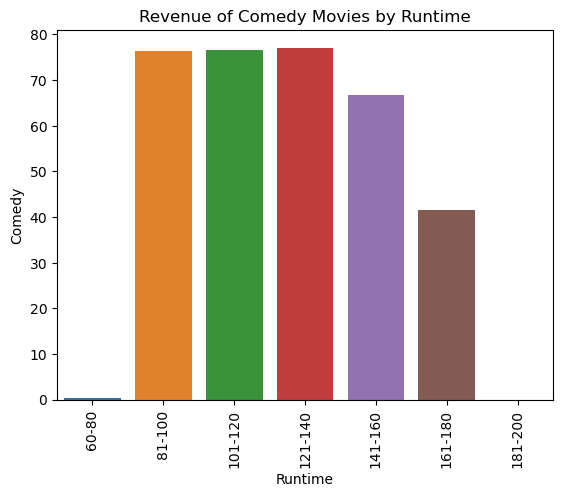

In [24]:
rev = sns.barplot(x= IMDBgrouped.T.loc['Comedy'].index, y= IMDBgrouped.T.loc['Comedy'])
rev.set(title = "Revenue of Comedy Movies by Runtime")
rev = rev.set_xticklabels(labels = IMDBgrouped.index, rotation = 90)
IMDBgmax.loc['Comedy'].Revenue = round(IMDBgrouped.T.loc['Comedy'].max(),2)
IMDBgmax.loc['Comedy'].Runtime = IMDBgrouped.T.loc['Comedy'].idxmax()

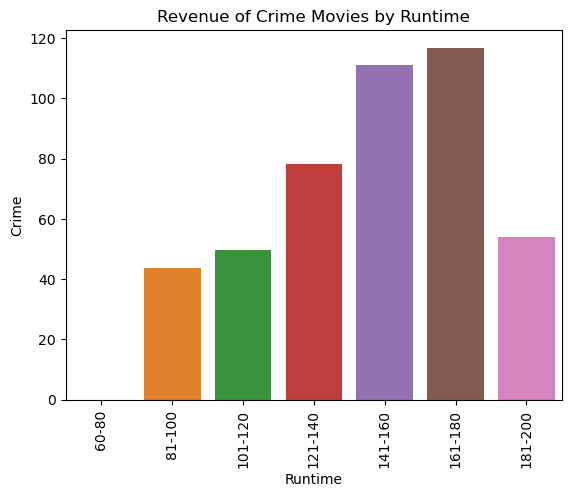

In [25]:
rev = sns.barplot(x= IMDBgrouped.T.loc['Crime'].index, y= IMDBgrouped.T.loc['Crime'])
rev.set(title = "Revenue of Crime Movies by Runtime")
rev = rev.set_xticklabels(labels = IMDBgrouped.index, rotation = 90)
IMDBgmax.loc['Crime'].Revenue = round(IMDBgrouped.T.loc['Crime'].max(),2)
IMDBgmax.loc['Crime'].Runtime = IMDBgrouped.T.loc['Crime'].idxmax()

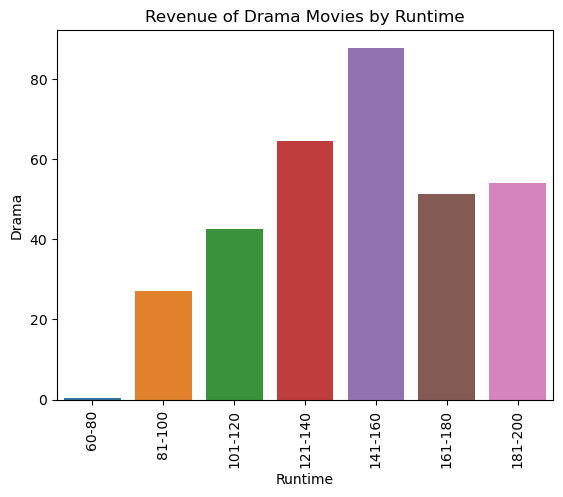

In [26]:
rev = sns.barplot(x= IMDBgrouped.T.loc['Drama'].index, y= IMDBgrouped.T.loc['Drama'])
rev.set(title = "Revenue of Drama Movies by Runtime")
rev = rev.set_xticklabels(labels = IMDBgrouped.index, rotation = 90)
IMDBgmax.loc['Drama'].Revenue = round(IMDBgrouped.T.loc['Drama'].max(),2)
IMDBgmax.loc['Drama'].Runtime = IMDBgrouped.T.loc['Drama'].idxmax()

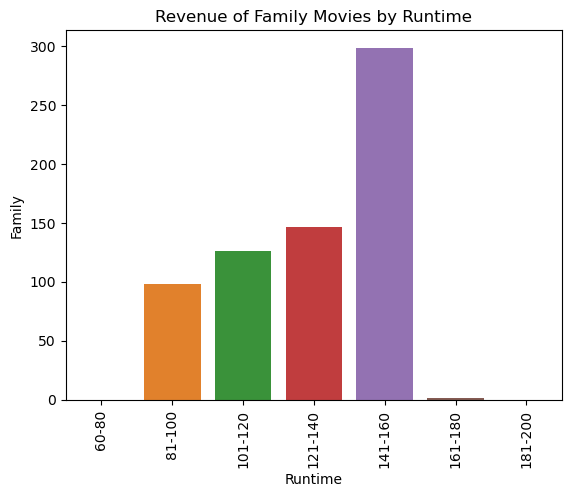

In [27]:
rev = sns.barplot(x= IMDBgrouped.T.loc['Family'].index, y= IMDBgrouped.T.loc['Family'])
rev.set(title = "Revenue of Family Movies by Runtime")
rev = rev.set_xticklabels(labels = IMDBgrouped.index, rotation = 90)
IMDBgmax.loc['Family'].Revenue = round(IMDBgrouped.T.loc['Family'].max(),2)
IMDBgmax.loc['Family'].Runtime = IMDBgrouped.T.loc['Family'].idxmax()

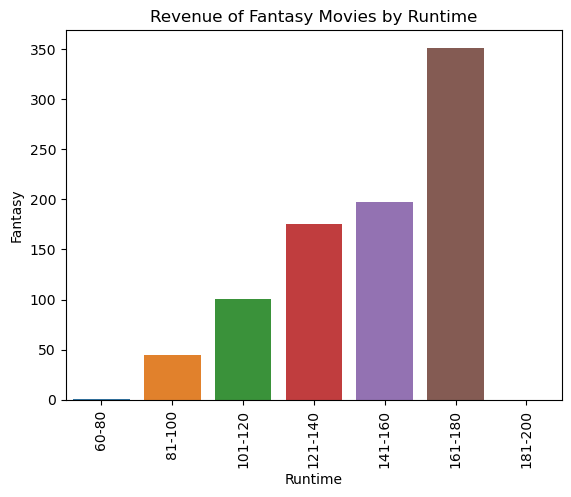

In [28]:
rev = sns.barplot(x= IMDBgrouped.T.loc['Fantasy'].index, y= IMDBgrouped.T.loc['Fantasy'])
rev.set(title = "Revenue of Fantasy Movies by Runtime")
rev = rev.set_xticklabels(labels = IMDBgrouped.index, rotation = 90)
IMDBgmax.loc['Fantasy'].Revenue = round(IMDBgrouped.T.loc['Fantasy'].max(),2)
IMDBgmax.loc['Fantasy'].Runtime = IMDBgrouped.T.loc['Fantasy'].idxmax()

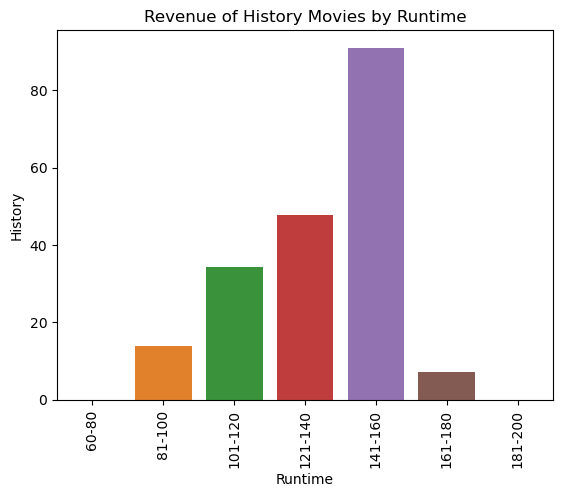

In [29]:
rev = sns.barplot(x= IMDBgrouped.T.loc['History'].index, y= IMDBgrouped.T.loc['History'])
rev.set(title = "Revenue of History Movies by Runtime")
rev = rev.set_xticklabels(labels = IMDBgrouped.index, rotation = 90)
IMDBgmax.loc['History'].Revenue = round(IMDBgrouped.T.loc['History'].max(),2)
IMDBgmax.loc['History'].Runtime = IMDBgrouped.T.loc['History'].idxmax()

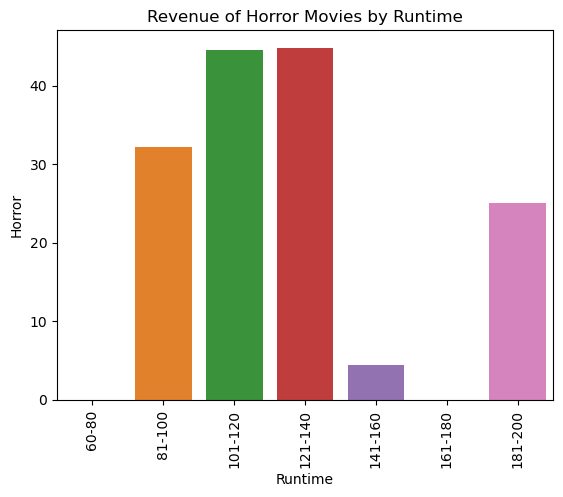

In [30]:
rev = sns.barplot(x= IMDBgrouped.T.loc['Horror'].index, y= IMDBgrouped.T.loc['Horror'])
rev.set(title = "Revenue of Horror Movies by Runtime")
rev = rev.set_xticklabels(labels = IMDBgrouped.index, rotation = 90)
IMDBgmax.loc['Horror'].Revenue = round(IMDBgrouped.T.loc['Horror'].max(),2)
IMDBgmax.loc['Horror'].Runtime = IMDBgrouped.T.loc['Horror'].idxmax()

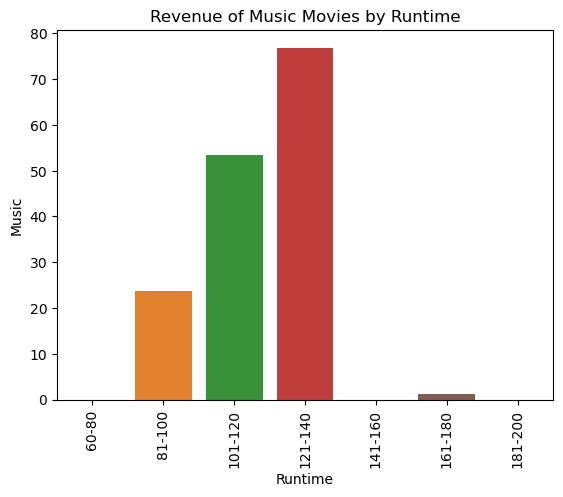

In [31]:
rev = sns.barplot(x= IMDBgrouped.T.loc['Music'].index, y= IMDBgrouped.T.loc['Music'])
rev.set(title = "Revenue of Music Movies by Runtime")
rev = rev.set_xticklabels(labels = IMDBgrouped.index, rotation = 90)
IMDBgmax.loc['Music'].Revenue = round(IMDBgrouped.T.loc['Music'].max(),2)
IMDBgmax.loc['Music'].Runtime = IMDBgrouped.T.loc['Music'].idxmax()

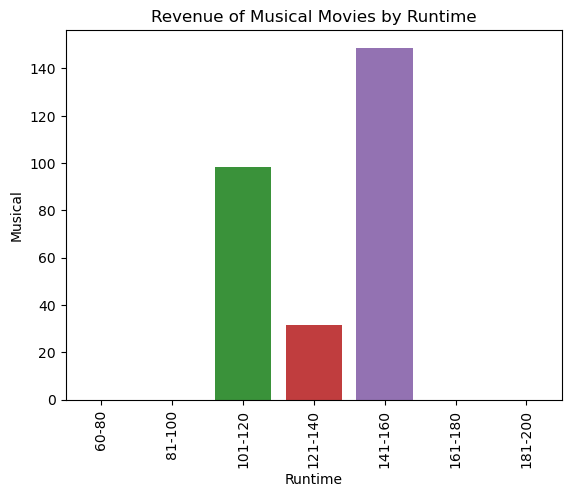

In [32]:
rev = sns.barplot(x= IMDBgrouped.T.loc['Musical'].index, y= IMDBgrouped.T.loc['Musical'])
rev.set(title = "Revenue of Musical Movies by Runtime")
rev = rev.set_xticklabels(labels = IMDBgrouped.index, rotation = 90)
IMDBgmax.loc['Musical'].Revenue = round(IMDBgrouped.T.loc['Musical'].max(),2)
IMDBgmax.loc['Musical'].Runtime = IMDBgrouped.T.loc['Musical'].idxmax()

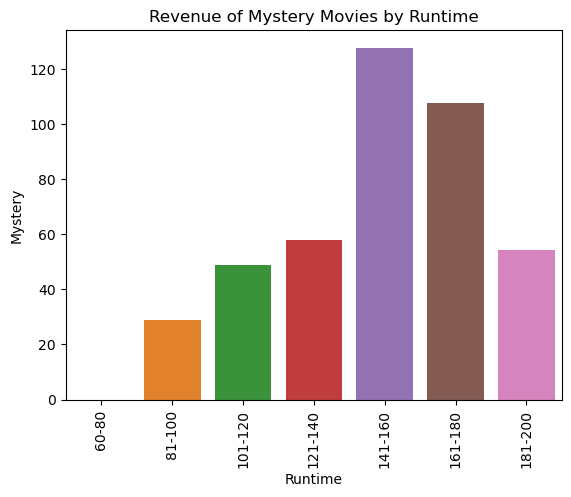

In [33]:
rev = sns.barplot(x= IMDBgrouped.T.loc['Mystery'].index, y= IMDBgrouped.T.loc['Mystery'])
rev.set(title = "Revenue of Mystery Movies by Runtime")
rev = rev.set_xticklabels(labels = IMDBgrouped.index, rotation = 90)
IMDBgmax.loc['Mystery'].Revenue = round(IMDBgrouped.T.loc['Mystery'].max(),2)
IMDBgmax.loc['Mystery'].Runtime = IMDBgrouped.T.loc['Mystery'].idxmax()

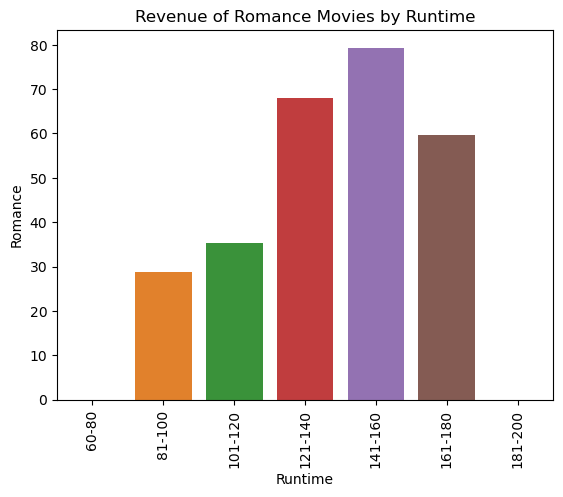

In [34]:
rev = sns.barplot(x= IMDBgrouped.T.loc['Romance'].index, y= IMDBgrouped.T.loc['Romance'])
rev.set(title = "Revenue of Romance Movies by Runtime")
rev = rev.set_xticklabels(labels = IMDBgrouped.index, rotation = 90)
IMDBgmax.loc['Romance'].Revenue = round(IMDBgrouped.T.loc['Romance'].max(),2)
IMDBgmax.loc['Romance'].Runtime = IMDBgrouped.T.loc['Romance'].idxmax()

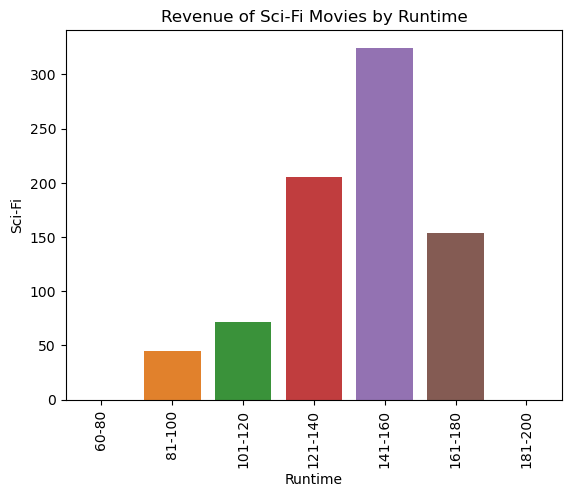

In [35]:
rev = sns.barplot(x= IMDBgrouped.T.loc['Sci-Fi'].index, y= IMDBgrouped.T.loc['Sci-Fi'])
rev.set(title = "Revenue of Sci-Fi Movies by Runtime")
rev = rev.set_xticklabels(labels = IMDBgrouped.index, rotation = 90)
IMDBgmax.loc['Sci-Fi'].Revenue = round(IMDBgrouped.T.loc['Sci-Fi'].max(),2)
IMDBgmax.loc['Sci-Fi'].Runtime = IMDBgrouped.T.loc['Sci-Fi'].idxmax()

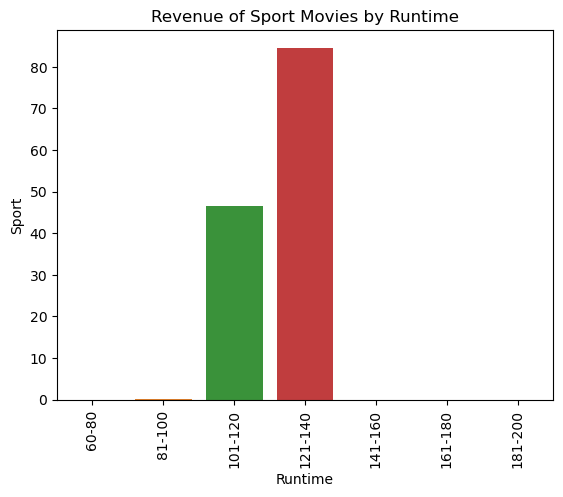

In [36]:
rev = sns.barplot(x= IMDBgrouped.T.loc['Sport'].index, y= IMDBgrouped.T.loc['Sport'])
rev.set(title = "Revenue of Sport Movies by Runtime")
rev = rev.set_xticklabels(labels = IMDBgrouped.index, rotation = 90)
IMDBgmax.loc['Sport'].Revenue = round(IMDBgrouped.T.loc['Sport'].max(),2)
IMDBgmax.loc['Sport'].Runtime = IMDBgrouped.T.loc['Sport'].idxmax()

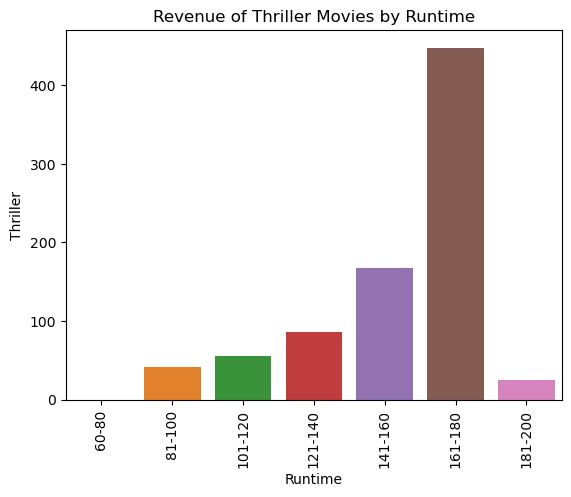

In [37]:
rev = sns.barplot(x= IMDBgrouped.T.loc['Thriller'].index, y= IMDBgrouped.T.loc['Thriller'])
rev.set(title = "Revenue of Thriller Movies by Runtime")
rev = rev.set_xticklabels(labels = IMDBgrouped.index, rotation = 90)
IMDBgmax.loc['Thriller'].Revenue = round(IMDBgrouped.T.loc['Thriller'].max(),2)
IMDBgmax.loc['Thriller'].Runtime = IMDBgrouped.T.loc['Thriller'].idxmax()

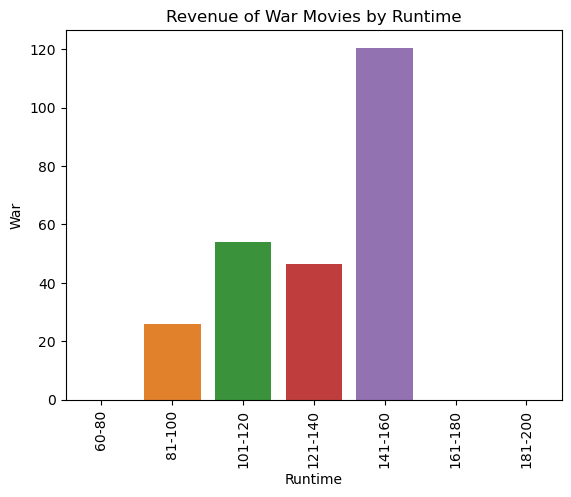

In [38]:
rev = sns.barplot(x= IMDBgrouped.T.loc['War'].index, y= IMDBgrouped.T.loc['War'])
rev.set(title = "Revenue of War Movies by Runtime")
rev = rev.set_xticklabels(labels = IMDBgrouped.index, rotation = 90)
IMDBgmax.loc['War'].Revenue = round(IMDBgrouped.T.loc['War'].max(),2)
IMDBgmax.loc['War'].Runtime = IMDBgrouped.T.loc['War'].idxmax()

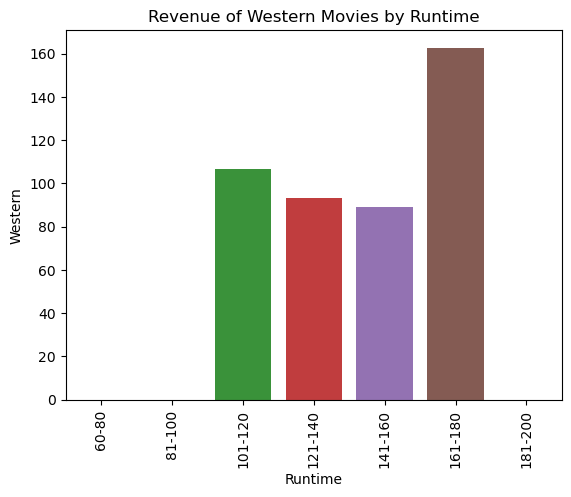

In [39]:
rev = sns.barplot(x= IMDBgrouped.T.loc['Western'].index, y= IMDBgrouped.T.loc['Western'])
rev.set(title = "Revenue of Western Movies by Runtime")
rev = rev.set_xticklabels(labels = IMDBgrouped.index, rotation = 90)
IMDBgmax.loc['Western'].Revenue = round(IMDBgrouped.T.loc['Western'].max(),2)
IMDBgmax.loc['Western'].Runtime = IMDBgrouped.T.loc['Western'].idxmax()

The following two Tables depict the Max Revenue and runtime/genre for each runtime/genre examined.

In [40]:
display(IMDBgmax)
display(IMDBrmax)

,Runtime,Revenue
Action,161-180,313.69
Adventure,161-180,265.17
Animation,101-120,213.88
Biography,141-160,77.05
Comedy,121-140,77.12
Crime,161-180,116.87
Drama,141-160,87.79
Family,141-160,298.47
Fantasy,161-180,351.75
History,141-160,91.05


,Genre,Revenue
60-80,Fantasy,0.92
81-100,Animation,191.08
101-120,Animation,213.88
121-140,Sci-Fi,205.59
141-160,Sci-Fi,324.8
161-180,Thriller,448.13
181-200,Crime,54.12


## Discussion

This assignemnt explored data from IMDB to find if characterists of movies with high revenue. Exploration of runtime and genre found no clear relation as to wether a single genre at a single runtime would lead to a higher revenue. The analysis found thrillers had the most revenue when exploring runtime and genre but that is due to an outlier in the data. However, individual analysis of runtime or genre found that when not taking the other variable into account, you can get an idea for what genres and runtimes have higher revenues. In the case of revenue by genre analysis, animation has the highest average revenue, this is most likely due to animation movies usually being marketed for kids or the whole family. When looking at revenue by runtime, movies with a runtime between 141-160 minutes (2 hours and 21-40 minutes) have the highest revenue, these are usually big movies that created a lot of build up amongst movie goers and generally become a big part of pop-culture of the time. However, these results should be taken lightly as not just runtime and genre atribute to revenue. Movie goers will like one animation but mock another, they might be able to sit through one three hour film but live the other. There is no gaurantee that if you make 141-160 minutes animated movie you will get a high revenue because there are other factors that drive audiances to see movies; acting, writing, and advertising are just some examples that could change a movie's revenue.

# References

1. Source data - https://www.kaggle.com/datasets/yusufdelikkaya/imdb-movie-dataset
2. Pandas for manipulation
3. Matpotlid for data visualization
4. Seaborn for data visualization
5. ChatGPT for introduction improvements - The following prompts were used:
    
    i.
            Can you edit this section and give me your thoughts on this introduction. I have attached the assignment guidelines and the introduction is written here.

            Since the unveiling of the kinetoscope in 1891, viewing moving pictures has become a popular pass time around the globe. These early movies were short and silent almost like stop-motion in live-action. As technology improved and got more complex we were able to add sound to the moving pictures and were able to make longer and longer productions. Today many films utilize music and dialogue as well as subtle emotion to show their story in longer more compelling runtimes. To many viewers, however, these longer runtimes can be problematic as it can be quite a challenge to knowingly give up 2-3 hours of your day. Modern movies come in a variety of genres and are a large part social culture. From the Jedi Church to Dudeism or from knowing what we do every night to wondering what's up with doc. Movies have left a heavy impression on societal culture. Many people have need to share their opinions and thoughts on anything, and in the world of art these people thrive as they can judge and rat a piece on the final outcome. Critics give their own thoughts on statues, paintings, dance recitals, operas, plays, and even movies. In the past critics would publish their opinions in newspapers and magazines, when the internet became mainstream the critics went digital. With the internet some critics opened their own blogs to share their thoughts, but suddenly everyone could share their opinions too. Websites like IMDB and Rotten Tomatoes allowed all viewers to rate and comment on movies. Using a data set of 1000 movies on IMDB, I will explore how genre and runtime can affect movie revenue.
    
    ii.
            could you stretch the revision to 150 - 200 words?
    
    iii.
            I am now analyzing if the director used would have effect on the revenue with respect to genre and runtime, could you make adjustments?